In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Download the Absenteeism at Work dataset

We will now import a dataset from the UCI Machine Learning repository. The data is deals with the records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.

Source: https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [2]:
employee_data = pd.read_csv("/Users/kamal/Desktop/work/20_JupyterNotebooks/Data/Absenteeism_at_work.csv")

employee_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2



The data has the following fields
- 1. Individual identification (ID) 
- 2. Reason for absence (ICD). 
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows: 

- I Certain infectious and parasitic diseases 
- II Neoplasms 
- III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism 
- IV Endocrine, nutritional and metabolic diseases 
- V Mental and behavioural disorders 
- VI Diseases of the nervous system 
- VII Diseases of the eye and adnexa 
- VIII Diseases of the ear and mastoid process 
- IX Diseases of the circulatory system 
- X Diseases of the respiratory system 
- XI Diseases of the digestive system 
- XII Diseases of the skin and subcutaneous tissue 
- XIII Diseases of the musculoskeletal system and connective tissue 
- XIV Diseases of the genitourinary system 
- XV Pregnancy, childbirth and the puerperium 
- XVI Certain conditions originating in the perinatal period 
- XVII Congenital malformations, deformations and chromosomal abnormalities 
- XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified 
- XIX Injury, poisoning and certain other consequences of external causes 
- XX External causes of morbidity and mortality 
- XXI Factors influencing health status and contact with health services. 
And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28). 
3. Month of absence 
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6)) 
5. Seasons (summer (1), autumn (2), winter (3), spring (4)) 
6. Transportation expense 
7. Distance from Residence to Work (kilometers) 
8. Service time 
9. Age 
10. Work load Average/day 
11. Hit target 
12. Disciplinary failure (yes=1; no=0) 
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4)) 
14. Son (number of children) 
15. Social drinker (yes=1; no=0) 
16. Social smoker (yes=1; no=0) 
17. Pet (number of pet) 
18. Weight 
19. Height 
20. Body mass index 
21. Absenteeism time in hours (target) 

In [3]:
employee_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


#### Plot a histogram for the reason for absence
Since there are 29 possible reasons, we create 29 bins

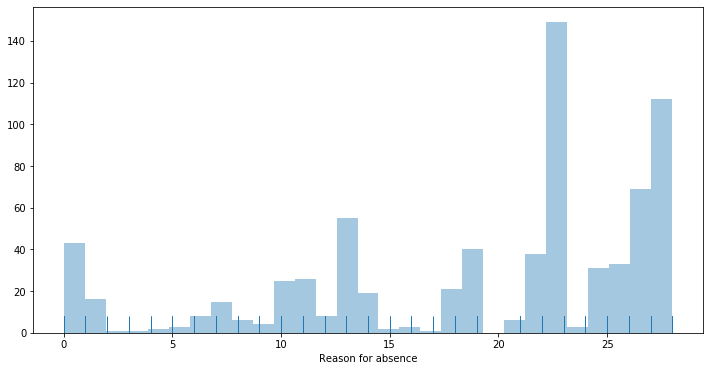

In [5]:
plt.subplots(figsize=(12,6))

sns.distplot(employee_data["Reason for absence"],
             bins = 29,
             kde = False,
             rug = True)

plt.show()

We see that the most of the employees are absent for medical consultation, dental consultation or physiotherapy.

## Let us try to see in which month for what reason employees are mostly absent. 

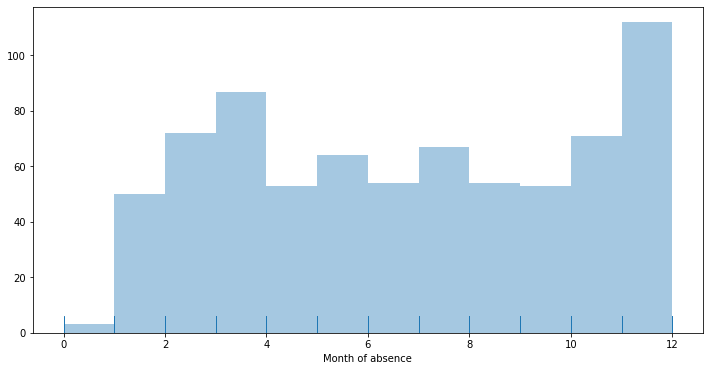

In [6]:
plt.subplots(figsize=(12,6))

sns.distplot(employee_data["Month of absence"],
             bins = 12,
             kde = False,
             rug = True)

plt.show()

Absenteeism is nearly non-existent in January, but high in April and December

#### Is there any relation between day of the week and reason for absenteeism?
Note that Sunday is Day #1 in this dataset

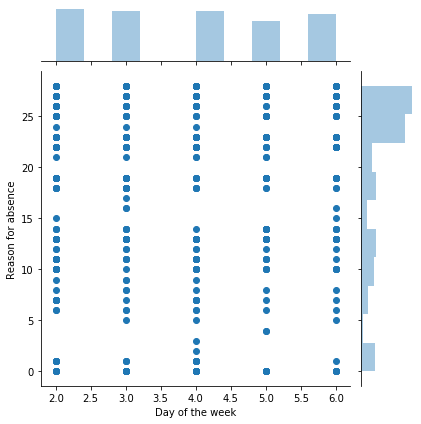

In [7]:
sns.jointplot(x = "Day of the week",
              y = "Reason for absence",
              data = employee_data, 
              height = 6)
plt.show()

Absenteeism is widely distributed across each day of the week with Thursday having the lowest level

#### In which season are employees likely to miss work? 

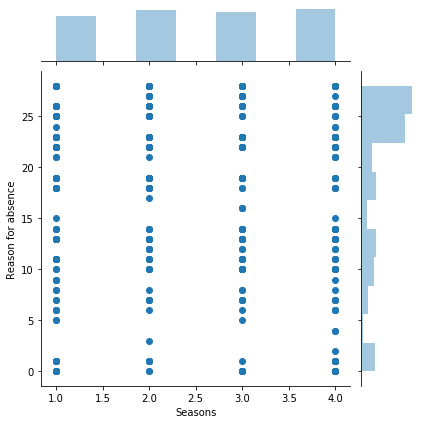

In [8]:
sns.jointplot("Seasons" ,
              "Reason for absence",
              data = employee_data,
              height = 6)

plt.show()

Strangely, there are no occurences of absenteeism due to lab exams in the autumn and winter

#### Use a pairplot to study multiple parameters
We check the relation between Distance from work, BMI and Age with absenteeism and workload. We also see if the numbers vary for employees who have a recorded dicliplinary incident and those who don't.

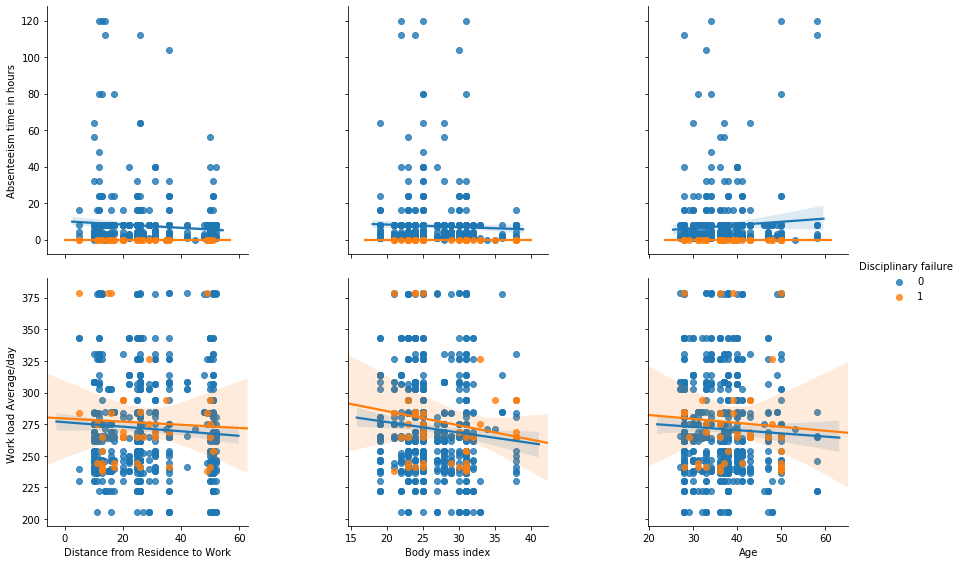

In [9]:
pairplot = sns.pairplot(employee_data,
                        height = 4,
                        aspect = 1,
                        
                        x_vars = ["Distance from Residence to Work",
                                  "Body mass index",
                                  "Age" ],
                        
                        y_vars = ["Absenteeism time in hours", 
                                  "Work load Average/day "],
                        
                        kind = "reg",
                        hue = "Disciplinary failure")

pairplot.fig.subplots_adjust(wspace = 0.5 , hspace = 0.1)

plt.show()

Conclusions from the above graphs:
* There appears to be no strong link between any of the factors (distance, BMI, Age) and absenteeism or work load
* A recorded disciplinary incident seems to correlate with lower absenteeism and a slightly higher workload